In [83]:
#importing library
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from joblib import dump,load

In [2]:
#importing data set Boston Housing
df_housing=pd.read_csv("data.csv")

In [3]:
#displying top 5 rows
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data Cleaning and Preprocessing


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
#dropping all the nan values
df_housing=df_housing.dropna()

In [7]:
#verifing if nan values are deleted or not
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#
for x in df_housing.columns:
    print(df_housing[x].value_counts(),'\n\n\n')

14.33370    2
0.01501     2
0.08265     1
4.34879     1
0.07165     1
           ..
0.07022     1
3.16360     1
5.69175     1
0.15876     1
0.03578     1
Name: CRIM, Length: 499, dtype: int64 



0.0      369
20.0      21
80.0      15
22.0      10
12.5       9
25.0       9
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64 



18.10    132
19.58     30
8.14      22
6.20      18
21.89     14
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64 



0    466
1     35
Name: CHAS, dtype: int64 



0.538    23
0.713    18
0.437    17
0.871    16
0.489    15
         ..
0.435     1
0.422     1
0.518     1
0.385     1
0.389     1
Name: NOX, Length: 81, dtype: int64 



5.713    3
6.229    3
6.417    3
6.

In [9]:
df_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B13D256908>,
      dtype=object)

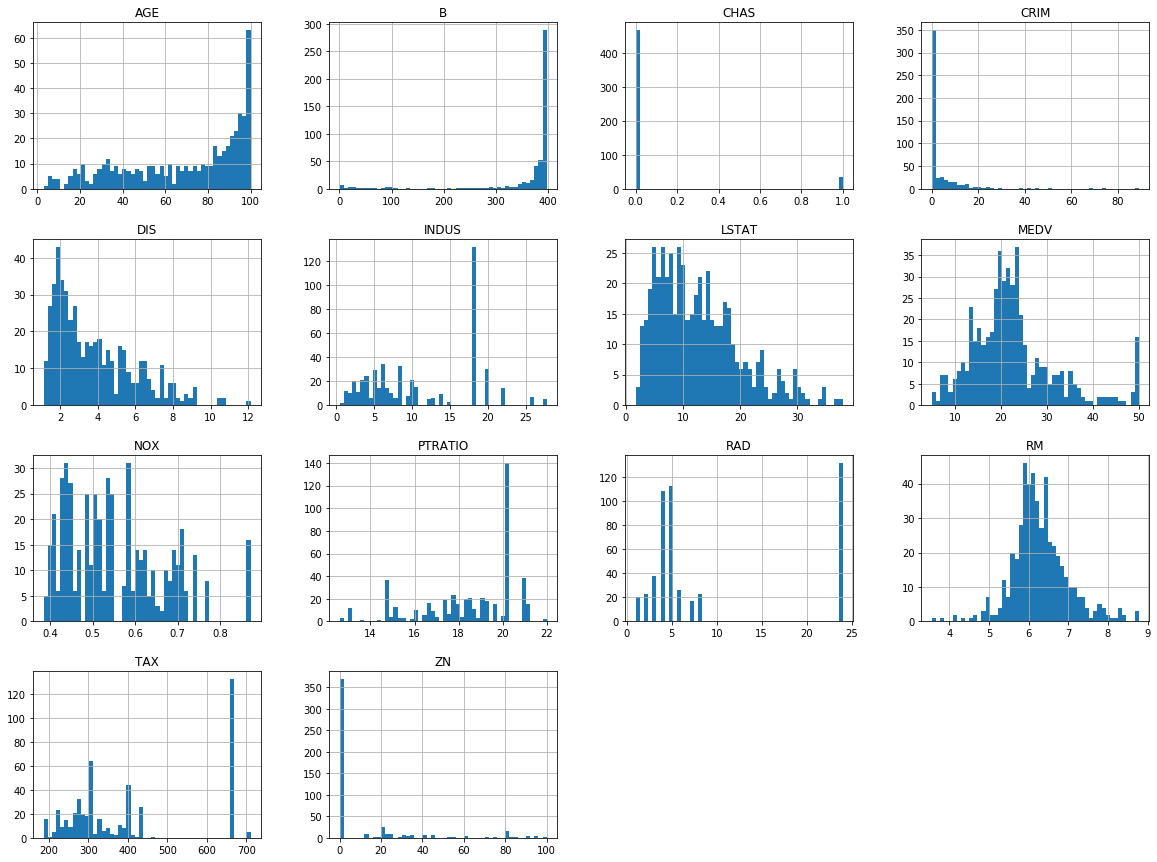

In [10]:
df_housing.hist(bins=50,figsize=(20,15))

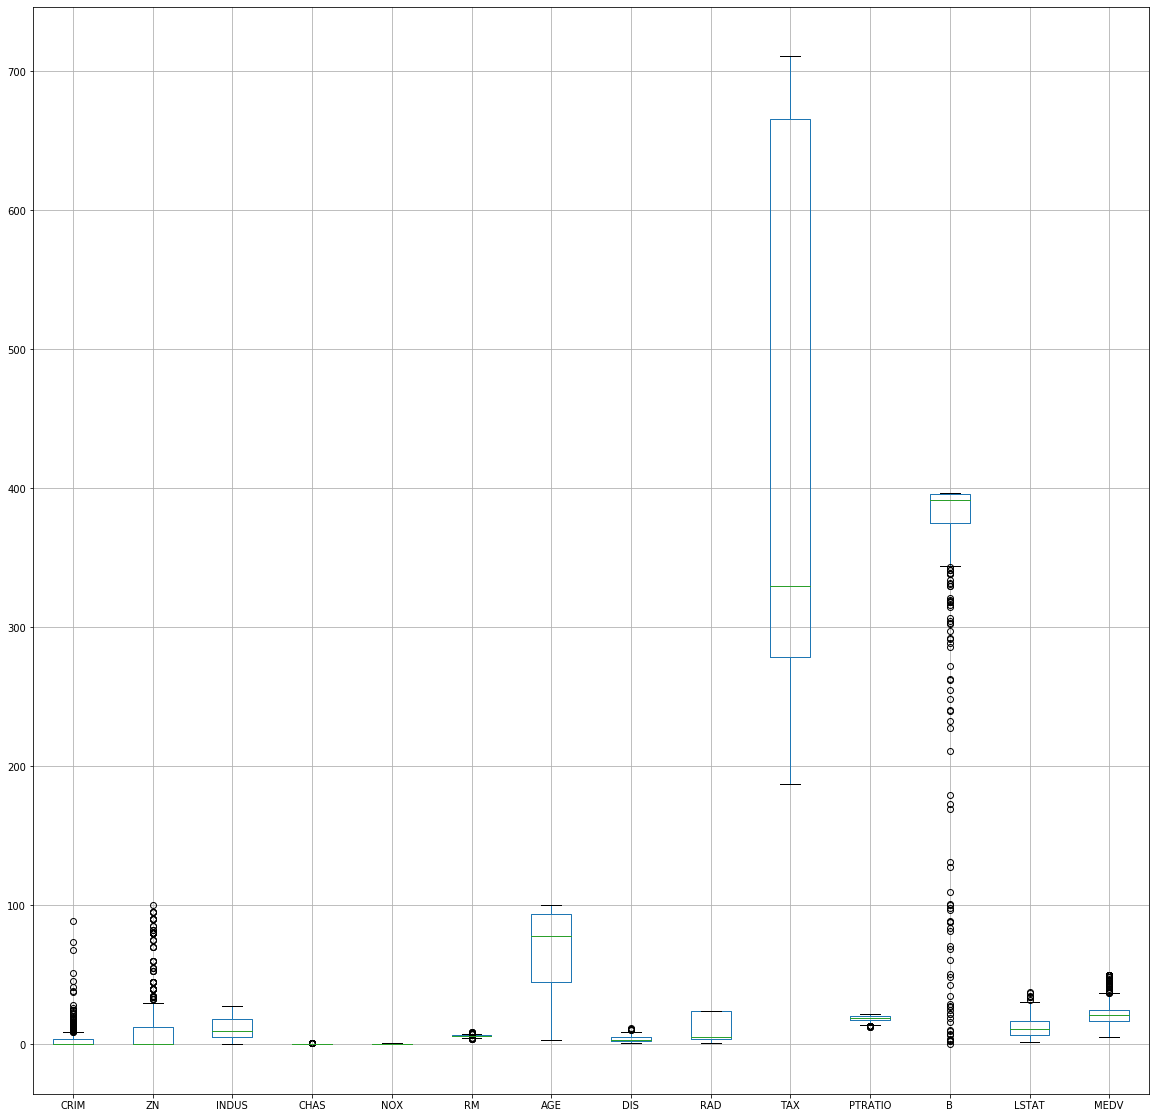

In [11]:
df_housing.boxplot(figsize=(20,20))

# Finding Correlations

In [12]:
#Finding Correlation with respect to MEDV
corr_max=df_housing.corr()
corr_max['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360031
B          0.335387
DIS        0.251709
CHAS       0.174679
AGE       -0.375437
RAD       -0.384730
CRIM      -0.390251
NOX       -0.428812
TAX       -0.471253
INDUS     -0.486625
PTRATIO   -0.511897
LSTAT     -0.737720
Name: MEDV, dtype: float64

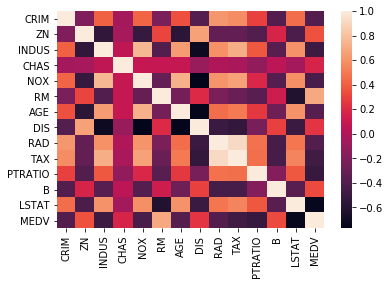

In [13]:
#ploting heatmap
sns.heatmap(corr_max)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B13E830788>,
      dtype=object)

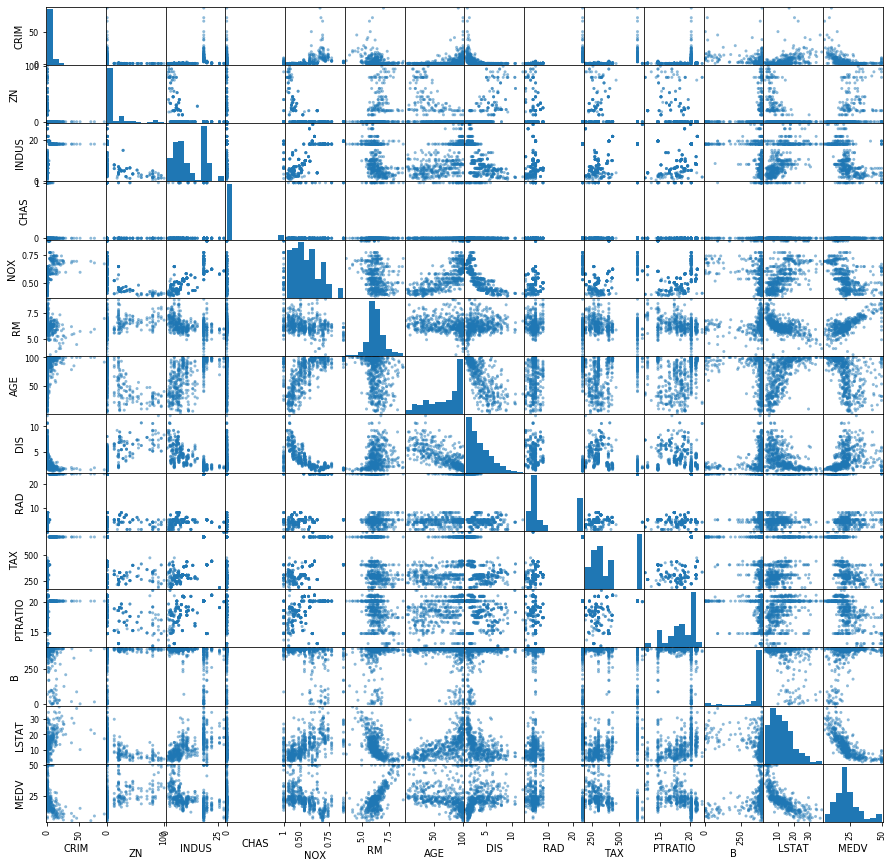

In [14]:
#Ploting Scatter Plot 
scatter_matrix(df_housing,figsize=(15,15))

# Creating a Pipeline 

In [28]:
my_pipeline=Pipeline([
    
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [29]:
new_X=my_pipeline.fit_transform(X)

In [30]:
new_X.shape

(501, 13)

# Train-Test Splitting 

In [31]:
X=df_housing.iloc[:,:-1]
y=df_housing.iloc[:,-1]


In [32]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y)

# Selecting a desired model 

In [56]:
model_liner_reg=LinearRegression()
model_decision_tree=DecisionTreeRegressor()
model_random_regressor=RandomForestRegressor()
model_liner_reg.fit(X_train,y_train)
model_decision_tree.fit(X_train,y_train)
model_random_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
y_test_pred_linear=model_liner_reg.predict(X_test)
y_test_pred_tree=model_decision_tree.predict(X_test)
y_test_pred_random=model_random_regressor.predict(X_test)

# Evaluating the model 

In [65]:
#Evaluating Linear Regression Model
mean_squared_error(y_test,y_test_pred_linear)
final_score_linear=np.sqrt(mean_squared_error(y_test,y_test_pred_linear))
final_score_linear

5.154167546684825

In [66]:
#Evaluating Decision Tree Regressor Model
mean_squared_error(y_test,y_test_pred_tree)
final_score_tree=np.sqrt(mean_squared_error(y_test,y_test_pred_tree))
final_score_tree

4.962134397391688

In [67]:
#Evaluating Random Forest Model
mean_squared_error(y_test,y_test_pred_random)
final_score_random=np.sqrt(mean_squared_error(y_test,y_test_pred_random))
final_score_random

3.664440120513008

# Evaluating using Cross Validation


In [80]:
#Evaluating Decision Tree Regressor Model using cross validation
scores_cross_tree=cross_val_score(model_decision_tree,X_test,y_test,scoring='neg_mean_squared_error',cv=10)
scores_cross_tree_final=np.sqrt( -scores_cross_tree) 
print('Descision Tree Model')
print('Scores:',scores_cross_tree_final)
print('Mean:',scores_cross_tree_final.mean() )
print('Standard Deviation:',scores_cross_tree_final.std())

Descision Tree Model
Scores: [4.55107764 4.92185081 4.8948953  5.07558257 9.19280655 8.19873349
 4.27989486 7.90669547 3.90384426 4.19195658]
Mean: 5.711733753779386
Standard Deviation: 1.8382653020739497


In [79]:
#Evaluating Linear Regression Model using cross validation
scores_cross_linear=cross_val_score(model_liner_reg,X_test,y_test,scoring='neg_mean_squared_error',cv=10)
scores_cross_linear_final=np.sqrt( -scores_cross_linear) 
print('Linear Regression Model')
print('Scores:',scores_cross_linear_final)
print('Mean:',scores_cross_linear_final.mean() )
print('Standard Deviation:',scores_cross_linear_final.std())

Linear Regression Model
Scores: [3.3029894  5.02157944 4.90169523 5.1204613  7.95616653 2.18572829
 3.08008427 6.05702703 2.25085541 4.63938111]
Mean: 4.451596801046413
Standard Deviation: 1.7043267012802386


In [75]:
#Evaluating Random Forest Model using cross validation
scores_cross_random=cross_val_score(model_random_regressor,X_test,y_test,scoring='neg_mean_squared_error',cv=10)
scores_cross_random_final=np.sqrt( -scores_cross_random) 
print('Random Forest Regressor')
print('Scores:',scores_cross_random_final)
print('Mean:',scores_cross_random_final.mean() )
print('Standard Deviation:',scores_cross_random_final.std())

Random Forest Regressor
Scores: [2.85065458 4.26523653 3.605947   4.6327698  7.32455363 2.9579469
 3.25070313 4.3599593  2.3472916  5.56208777]
Mean: 4.115715023188615
Standard Deviation: 1.4076303612088539


# Saving Model 

In [84]:
dump(model_random_regressor,'best_housing_model.joblib')

['best_housing_model.joblib']

# Using Saved Model

In [92]:
features=[[-0.4150548 , -0.48746425 ,-1.2701122 , -0.2740571 , -0.5785382  , 2.100576,
  0.5246452,  -0.49752972, -0.7559262,  -1.2800745,  -0.30196095 , 0.42870992,
 -0.7104585 ]]

In [93]:
model=load('best_housing_model.joblib')

In [95]:
model.predict(features)

array([43.668])